## Art500K (without images, just labels)

In [2]:
import pandas as pd
import numpy as np

To get the original data, download it from https://deepart.hkust.edu.hk/ART500K/dataset/label_list.zip and unzip. As of 2023.11.14, the zip file contains two files: one is *label_list.csv*, the other is *head_info.csv*. They are not actually comma separated, but tab separated, which is why we manually converted them to a *.txt* file (*label_list.txt*), and exported it into a *.csv* file (*art500k_full.csv*). The cleaned data then is stored in *art500k_cleaned.csv*.

In [3]:
art500k_head = pd.read_csv('datasets/originals/head_info.csv')
print(art500k_head.columns)
print("Columns: ", len(art500k_head.columns))

Index(['['author_name'', ' 'painting_name'', ' 'image_url'', ' 'Genre'',
       ' 'Style'', ' 'Nationality'', ' 'Painting School'', ' 'Art Movement'',
       ' 'Field'', ' 'Date'', ' 'Influenced by'', ' 'Media'',
       ' 'Influenced on'', ' 'Family and Relatives'', ' 'Tag'', ' 'Pupils'',
       ' 'Location'', ' 'Original Title'', ' 'Dimensions'', ' 'Series'',
       ' 'Teachers'', ' 'Friends and Co-workers'', ' 'Art institution'',
       ' 'Period'', ' 'Theme'', ' 'Path']'],
      dtype='object')
Columns:  26


In [4]:
#See: https://pandas.pydata.org/docs/reference/api/pandas.read_table.html
sm = pd.read_table('datasets/originals/label_list.txt',sep='\t|\s{4,}', header=0, engine='python', on_bad_lines='warn')
sm

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hanic\AppData\Local\Temp\ipykernel_34700\3157353706.py:2: SyntaxWarning: invalid escape sequence '\s'
  sm = pd.read_table('datasets/originals/label_list.txt',sep='\t|\s{4,}', header=0, engine='python', on_bad_lines='warn')
Skipping line 33714: Expected 26 fields in line 33714, saw 30. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 78339: Expected 26 fields in line 78339, saw 27. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 85281: Expected 26 fields in line 85281, saw 27. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 90920: Expected 26 fields in line 90920, saw 27. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100081: Expected 26 fields in line 100081, sa

,author_name,painting_name,image_url,Genre,Style,Nationality,PaintingSchool,ArtMovement,Field,Date,...,Location,OriginalTitle,Dimensions,Series,Teachers,FriendsandCoworkers,Artinstitution,Period,Theme,Path
0,Gustave Courbet,Woman With A Parrot##AAHozJAL0gqXcA,http://lh3.googleusercontent.com/nPuY2uKye4csy...,NaN,NaN,NaN,NaN,NaN,Painting,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artists1/Gustave Courbet/Woman With A Parrot##...
1,Auguste Rodin,La Tentation Saint Antoine##WAGC82imJTDyIg,http://lh3.googleusercontent.com/CgGN-xuGOgzBu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Acquis de Rodin Auguste en 1903 avec l'aide d...,NaN,NaN,Artists1/Auguste Rodin/La Tentation Saint Anto...
2,Frida Kahlo,Retrato De Alejandro Gómez Arias##0QFuguLe4xyN_A,http://lh3.googleusercontent.com/j-stBr_Q1mblB...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artists1/Frida Kahlo/Retrato De Alejandro Góme...
3,Banksy,The Wall Banksy Balloons##FgHoVE-hmt6DBQ,http://lh4.ggpht.com/DajPMSanJJDk7gPghfEqoT5Ru...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,in a settlement in Palestine in the middle east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artists1/Banksy/The Wall Banksy Balloons##FgHo...
4,El Greco,The Visitation##HQEQ_qXDtRrzkA,http://lh4.ggpht.com/dYGuyZERVymx98N9Uw3KKvOU6...,NaN,NaN,NaN,NaN,NaN,Painting,ca. 1610-1614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766796,Theodore Gericault,Five Horses Seen From Behind With Croupes In A...,https://uploads2.wikiart.org/images/theodore-g...,animal painting,Romanticism,French,NaN,Romanticism,"painting,lithography",1820 - 1822,...,NaN,NaN,38 x 46 cm,NaN,"Horace Vernet,Pierre-Narcisse Guerin",Eugene Delacroix,"École des Beaux-Arts, Paris, France",NaN,NaN,Artists2/Theodore Gericault/Five Horses Seen F...
766797,Pietro Perugino,Pala Di Fano Nativity Of Mary,https://uploads7.wikiart.org/images/pietro-per...,religious painting,High Renaissance,Italian,Umbrian school,High Renaissance,"painting,fresco",1497,...,NaN,Pala di Fano,NaN,NaN,Andrea del Verrochio,"Leonardo da Vinci,Sandro Botticelli",NaN,NaN,NaN,Artists2/Pietro Perugino/Pala Di Fano Nativity...
766798,Hans Memling,Christ Blessing Central Panel From A Triptych ...,https://uploads8.wikiart.org/images/hans-memli...,religious painting,Northern Renaissance,Flemish,"Bruges School,Flemish School",Northern Renaissance,painting,c.1487 - 1490,...,NaN,NaN,164 x 212 cm,NaN,NaN,NaN,NaN,NaN,NaN,Artists2/Hans Memling/Christ Blessing Central ...
766799,Giotto,Fortitude,https://uploads5.wikiart.org/images/giotto/for...,allegorical painting,Proto Renaissance,Italian,Florentine School,Proto Renaissance,"painting,fresco,architecture",1306,...,"Scrovegni (Arena) Chapel, Padua, Italy",Forza d'animo,NaN,The Seven Virtues,Cimabue,NaN,NaN,NaN,NaN,Artists2/Giotto/Fortitude.jpg


In [20]:
#Save into csv
sm.to_csv('datasets/art500k_full.csv', index=False)

In [5]:
#Cleaning
drop_columns = ["image_url",'OriginalTitle', 'Dimensions', 'FamilyandRelatives', 'Path', "Theme", "Period" ] #Theme is very rarely not null, Period rare too and has wrong data too
debatable = ["Artinstitution", "Field", "Series", 'Media'] #Media contains good info but not for this project
sm_cleaned = sm.drop(drop_columns+debatable, axis=1)
drop_artist =["NoAuthor", "Unknown", "unknown"]
sm_cleaned = sm_cleaned[~sm_cleaned['author_name'].isin(drop_artist)].reset_index(drop=True)
sm_cleaned

,author_name,painting_name,Genre,Style,Nationality,PaintingSchool,ArtMovement,Date,Influencedby,Influencedon,Tag,Pupils,Location,Teachers,FriendsandCoworkers
0,Gustave Courbet,Woman With A Parrot##AAHozJAL0gqXcA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Auguste Rodin,La Tentation Saint Antoine##WAGC82imJTDyIg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frida Kahlo,Retrato De Alejandro Gómez Arias##0QFuguLe4xyN_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banksy,The Wall Banksy Balloons##FgHoVE-hmt6DBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,in a settlement in Palestine in the middle east,NaN,NaN
4,El Greco,The Visitation##HQEQ_qXDtRrzkA,NaN,NaN,NaN,NaN,NaN,ca. 1610-1614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669016,Theodore Gericault,Five Horses Seen From Behind With Croupes In A...,animal painting,Romanticism,French,NaN,Romanticism,1820 - 1822,"John Constable,Peter Paul Rubens,Michelangelo,...","Eugene Delacroix,Piotr Michałowski,Romanticism","animals,horses",NaN,NaN,"Horace Vernet,Pierre-Narcisse Guerin",Eugene Delacroix
669017,Pietro Perugino,Pala Di Fano Nativity Of Mary,religious painting,High Renaissance,Italian,Umbrian school,High Renaissance,1497,NaN,Mariotto Albertinelli,"Christianity,Nativity",Raphael,NaN,Andrea del Verrochio,"Leonardo da Vinci,Sandro Botticelli"
669018,Hans Memling,Christ Blessing Central Panel From A Triptych ...,religious painting,Northern Renaissance,Flemish,"Bruges School,Flemish School",Northern Renaissance,c.1487 - 1490,"Rogier van der Weyden,Jan van Eyck","Raphael,Mariotto Albertinelli",NaN,NaN,NaN,NaN,NaN
669019,Giotto,Fortitude,allegorical painting,Proto Renaissance,Italian,Florentine School,Proto Renaissance,1306,Byzantine Art,"Proto Renaissance,Jose Clemente Orozco,Cennino...","allegories-and-symbols,fortitude",NaN,"Scrovegni (Arena) Chapel, Padua, Italy",Cimabue,NaN


In [6]:
print(sm_cleaned["Tag"].value_counts()) # Not bad actually
weird =[]
for index, row in sm_cleaned.iterrows():
    if((row["Date"] is not np.nan) & (type(row["Date"])!=str)):
        weird.append(row)

print(weird) #No not np.nan or not string dates

Tag
female-portraits                               5237
male-portraits                                 3402
male-portraits,famous-people                   1331
female-nude                                    1221
forests-and-trees                              1120
                                               ... 
male-portraits,famous-people,Gautier              1
winter,hunting-and-racing,forests-and-trees       1
Christianity,Cain                                 1
palaces-and-mausoleums,mountains                  1
21.4 x 15.8 cm                                    1
Name: count, Length: 14062, dtype: int64
[]


In [72]:
sm.to_csv('datasets/art500k_cleaned.csv', index=False)

### Steps:

1. Add art movement for each cell based on e.g. date or movement common for artist #First add common movement then check remaining authors
2. Create artist dataset: Add first and last year found in "Date" for artist. (Maybe doable with Regex)
3. Recognize regions: I thought for countries, we can use this API for example: collect all countries in a list from https://restcountries.com/#endpoints-all
4. Add "alias" names for artists, store them in a dictionary maybe (e.g. "Vincent van Gogh" and "Van Gogh", or "Rembrandt" and "Rembrandt van Rijn")

## Second Art500k dataset: Gathered from Rasta. It has 370k paintings

https://github.com/nphilou/rasta/tree/master

In [37]:
#This is gathered from Rasta  
sm2 = pd.read_table('datasets/originals/art500k_rasta370k.txt', header=0, engine='python', sep='\t|\s{4,}')
sm2.head(3)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hanic\AppData\Local\Temp\ipykernel_22164\1917862527.py:3: SyntaxWarning: invalid escape sequence '\s'
  sm2 = pd.read_table('datasets/originals/art500k_rasta370k.txt', header=0, engine='python', sep='\t|\s{4,}')


,img_id,img_name,img_path,img_title,artist,origin,art_movement,genre,media,style,location,technique,school,date,time,object,color,url
0,1,1.jpg,data_img/1.jpg,Portraits of Giuliano and Francesco Giamberti ...,Piero di Cosimo,West,NaN,NaN,oil on panel,NaN,NaN,NaN,NaN,1482,15,NaN,NaN,http://lh4.ggpht.com/NwCWmjro4h__Ord5RqicIJsJb...
1,2,2.jpg,data_img/2.jpg,Militia Company of District II under the Comma...,Rembrandt Harmensz. van Rijn,West,NaN,NaN,oil on canvas,NaN,NaN,NaN,NaN,1642,17,NaN,NaN,http://lh6.ggpht.com/ZYWwML8mVFonXzbmg2rQBulNu...
2,3,3.jpg,data_img/3.jpg,"Portrait of a Couple as Isaac and Rebecca, kno...",Rembrandt Harmensz. van Rijn,West,NaN,NaN,oil on canvas,NaN,NaN,NaN,NaN,1665,17,NaN,NaN,http://lh5.ggpht.com/H-KfOaNgW2an_g0kODWKua5BE...


In [39]:
sm2_drop_columns = ["img_name", "img_path", "img_title","url", "color", "object"]
sm2_debatable = ["img_id", "object", "media"]
sm2_cleaned = sm2.drop(sm2_drop_columns+sm2_debatable, axis=1)

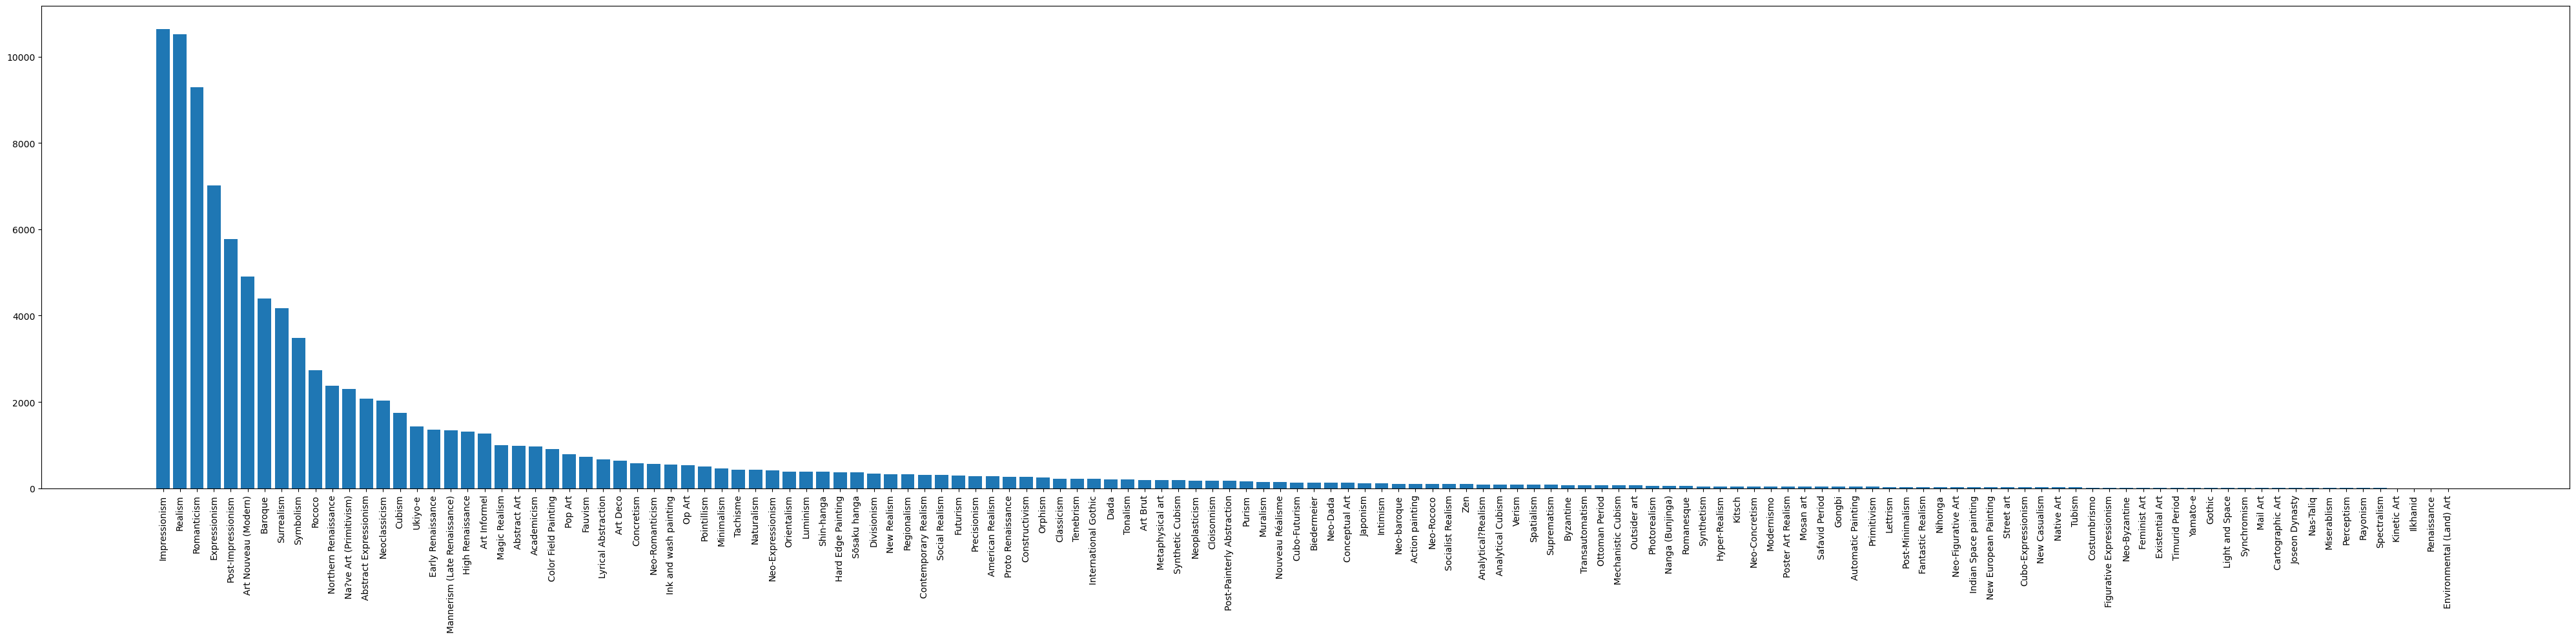

In [32]:
#I copied this from GitHub

import pandas as pd
import numpy as np
import os
from os.path import join
import argparse
import matplotlib.pyplot as plt

def get_subset(dataset, indices):
    return dataset[indices]


def split_labels(labels, sep=10000):
    return labels[:sep], labels[sep:]

df = sm2
count = df.groupby('style').size().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (40, 10)
plt.bar(count.keys(), count)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# df.loc[:, 'style'].dropna().plot(x='style')
# print(df.loc[df['style'].isin(['Impressionism', 'Expressionism'])].head())
# print(df.loc[df['style'].isin(['Impressionism', 'Expressionism'])][['img_id', 'style']].head())
# print(df['style'].isin(['Impressionism', 'Expressionism'])[262924:262935])
keep_list = df['style'].isin(['Impressionism', 'Expressionism']).tolist()
# keep_list = [True, True, False, True, False, False]
batch_count = 37


## Differences

In [68]:
print("First set authors:",len(sm_cleaned["author_name"].unique()))
print("Second set authors:",len(sm2_cleaned["artist"].unique()))
common = set(sm_cleaned["author_name"].unique()) & set(sm2_cleaned["artist"].unique())
union = set(sm_cleaned["author_name"].unique()) | set(sm2_cleaned["artist"].unique())
print("Common ones:", len(common)); print("Different:",len(union))
#diff2 = set(sm2_cleaned["artist"].unique()) - set(sm_cleaned["author_name"].unique())
sm_common_artists = sm_cleaned[sm_cleaned["author_name"].isin(common)].reset_index(drop=True) ["author_name"].value_counts().to_frame()
sm_common_artists["amounts"] = None
sm_common_artists.reset_index(inplace=True)

for row in sm_common_artists:
    #Sum of the two dataset amounts
    row["amounts"]= sm_cleaned[sm_cleaned["author_name"]==row["index"]]["author_name"].value_counts().to_frame() + sm2_cleaned[sm2_cleaned["artist"]==row["index"]]["artist"].value_counts().to_frame()

First set authors: 41093
Second set authors: 16001
Common ones: 4714
Different: 52380


TypeError: string indices must be integers, not 'str'

In [65]:
sm_common_artists = sm_cleaned[sm_cleaned["author_name"].isin(common)].reset_index(drop=True) ["author_name"].value_counts().to_frame()
sm_common_artists["amounts"] = None
sm_common_artists.reset_index(inplace=True)

The first one is I guess more complete, but the second one is more cleaned maybe. 

Either way, the dataset is cool, maybe we can define connections based on this data. <br>
However it has more "random" pictures, like I have never heard of the artists with most paintings


In [44]:
sm_cleaned["author_name"].value_counts()[0:30]

author_name
Margaret Bourke-White             16879
Alfred Eisenstaedt                 9948
Co Rentmeester                     9944
Grey Villet                        9943
George Silk                        9942
Bill Eppridge                      9941
Lee Balterman                      9939
Ralph Morse                        9937
Gjon Mili                          9935
Andreas Feininger                  9930
Carl Mydans                        9925
Loomis Dean                        9923
Cornell Capa                       9918
Hansel Mieth                       9914
Peter Stackpole                    9909
David Scherman                     9907
Gordon Parks                       9390
Herbert Gehr                       5572
Larry Burrows                      4725
W. Eugene Smith                    3897
Marguerite Porracchia              3758
Meissener Porzellan Manufaktur     3243
George Rodger                      3215
James Abbott McNeill Whistler      2468
Rembrandt                   

In [45]:
#Maybe this one is more okay
sm2_cleaned["artist"].value_counts()[0:30]

artist
Anonymous                         31840
anoniem                            7729
George Hendrik Breitner            6564
Jan Luyken                         4209
Reinier Vinkeles                   3529
Marius Bauer                       2617
Bernard Picart                     1765
Isaac Israels                      1643
Rembrandt Harmensz. van Rijn       1493
Johannes Tavenraat                 1487
Jacob Houbraken                    1416
Simon Fokke                        1271
Wenceslaus Hollar                  1093
Johann Sadeler (I)                 1011
Meissener Porzellan Manufaktur     1006
Philips Galle                       976
Romeyn de Hooghe                    952
Jan van de Velde (II)               927
Caspar Luyken                       916
Leo Gestel                          895
Anton Mauve                         864
Jacques Callot                      816
Crispijn van de Passe (I)           803
Carel Adolph Lion Cachet            735
Willem Witsen                    